In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist, mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train = X_train.reshape((len(X_train), 784))
X_test = X_test.reshape((len(X_test), 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
from tensorflow.keras.models import Model

In [14]:
from tensorflow.keras.layers import Dense,Input

In [15]:
# This is our input image
input_img = Input(shape=(784,))

In [16]:
# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)

In [17]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [18]:
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [19]:
encoder = Model(input_img, encoded)

In [20]:
# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(32,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [21]:
autoencoder.compile(optimizer='rmsprop', 
                    loss='binary_crossentropy')

In [22]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3257 - val_loss: 0.3021
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2931 - val_loss: 0.2908
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2884 - val_loss: 0.2885
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2865 - val_loss: 0.2873
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2855 - val_loss: 0.2865
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2849 - val_loss: 0.2860
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2845 - val_loss: 0.2859
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2842 - val_loss: 0.2860
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - val_loss: 0.2866
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.283

In [23]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)

In [24]:
decoded_imgs = decoder.predict(encoded_imgs)

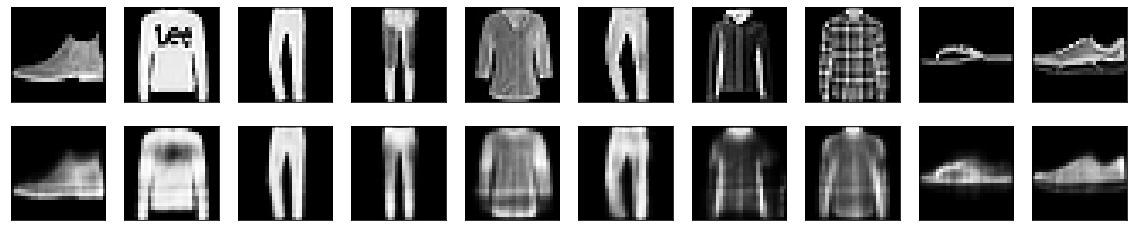

In [26]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()